## 1. Linear Regression

Loss function：
$$L(w) = \frac{1}{2M}\sum_{i=1}^{m}(y-x_iw)^2$$

闭解式：$W=(X^TX)^{-1}X^TY$
    
如果 $X^TX$ 没有逆矩阵， 则不能使用这种方法，可以采用梯度下降等优化方法求近似解

## 2. Ridge regression

add regularization for linear regression

Loss function:
$$L(w) = \frac{1}{2m}\sum_{i=1}^{m}(y-x_iw)^2 + \lambda\sum_{i=1}^{n}w_{i}^2$$

闭解式：$W = (X^TX + \lambda{I})^{-1}X^TY$
    
## 3. Lasso regression

add l1 regularization

Loss function:

$$L(w) = \frac{1}{2m}\sum_{i=1}^{m}(y-x_iw)^2 + \lambda \sum_{i=1}^{n}\left | w_i \right |$$

这里不能采用闭解式， 可以采用向前逐步回归。

## 4. 局部加权线性回归

给待测点附近等每个点赋予一定的权重。

损失函数：

$$L(\theta ) = \frac{1}{2M}\sum_{i=1}^{m}w_i(y-x_i\theta)^2$$

其中， $w_i$表示第i个样本的权重。

局部加权线性回归使用“核”来对附近对点赋予更高的权重。核的类型可以自由选择，最常用的核就是高斯核，高斯核对应的权重如下：

$$exp(\frac{\left | w_i-x \right |}{-2k^2})$$

这样就有一个只含对角元素的权重矩阵W，并且点$x_i$与x越近，$w_i$也会越大。这里的参数k决定了对附近的点赋予多大的权重，这也是唯一需要考虑的参数。

当k越大，有越多的点被用于训练回归模型；
当k越小，有越少的点用于训练回归模型。

In [1]:
import numpy as np
from numpy.linalg import det
from numpy.linalg import inv
from numpy import mat
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

[[ 0.00030751 -0.0061091 ]
 [-0.0061091   0.13629137]]
[[6.38407183]]


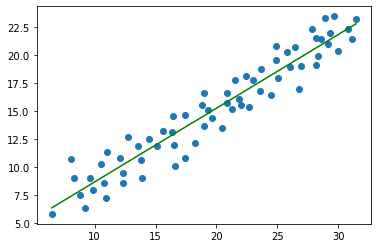

In [43]:
class LinearRegression:
    def __init__(self):
        pass
    
    def train(self, x_train, y_train):
        x_mat = mat(x_train).T #67x1
        y_mat = mat(y_train).T #67x1
        [m,n] = x_mat.shape #67 1
        x_mat = np.hstack((x_mat, mat(np.ones((m, 1))))) #67x2
        self.weight = mat(random.rand(n+1,1)) # 2x1
        if det(x_mat.T*x_mat) == 0:
            print('the det of xTx is equal to zero')
            return
        else:
            print(inv(x_mat.T*x_mat))
            self.weight = inv(x_mat.T*x_mat)*x_mat.T*y_mat
        return self.weight

    def lr_predict(self, x_test):
        m = len(x_test)
        x_mat = np.hstack((mat(x_test).T, np.ones((m,1))))
        return x_mat * self.weight
    
    def plot_lr(self, x_train, y_train):
        x_min = x_train.min()
        x_max = x_train.max()
        y_min = self.weight[0] * x_min + self.weight[1]
        y_max = self.weight[0] * x_max + self.weight[1]
        plt.scatter(x_train, y_train)
        plt.plot([x_min, x_max], [y_min[0,0], y_max[0,0]],'-g')
        plt.show()
        

def main():
    data = pd.read_csv('Data/Regression.csv')
    x_train = data['x'].values
    y_train = data['y'].values
    regression = LinearRegression()
    regression.train(x_train, y_train)
    y_predict = regression.lr_predict(x_train)
    regression.plot_lr(x_train, y_train)
main()

In [34]:
data = pd.read_csv('Data/Regression.csv')
x_train = data['x'].values
y_train = data['y'].values
print(len(x_train))

67
